# Image Classifier



In [121]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os as os
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import seaborn as sns
sns.set()

In [5]:
imagen=[]
valor=[]
final=[]
carpeta=['class_aleatorio','class_balistica','NNN']

We are going to read the images generated by the python script, the images belong to 3 different categories are they are in separate folders

In [6]:
for i in carpeta:
    
    for j in os.listdir(f"{i}"):
        img=load_img(f"{i}/{j}")
        imagen.append(img_to_array(img))
        valor.append(i)

final=[imagen,valor]

In [7]:
A=np.array(final,dtype='object')
A=A.T

We transform the images to arrays and save each imagen and class in a array. Once we have our array the next step is to split the sets to avoid leakages

## Split the datasets
Using the train_test_split function, we save the 10% os de set for test_set

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(A[:,0],A[:,1],test_size=0.10,random_state=42,shuffle=True)

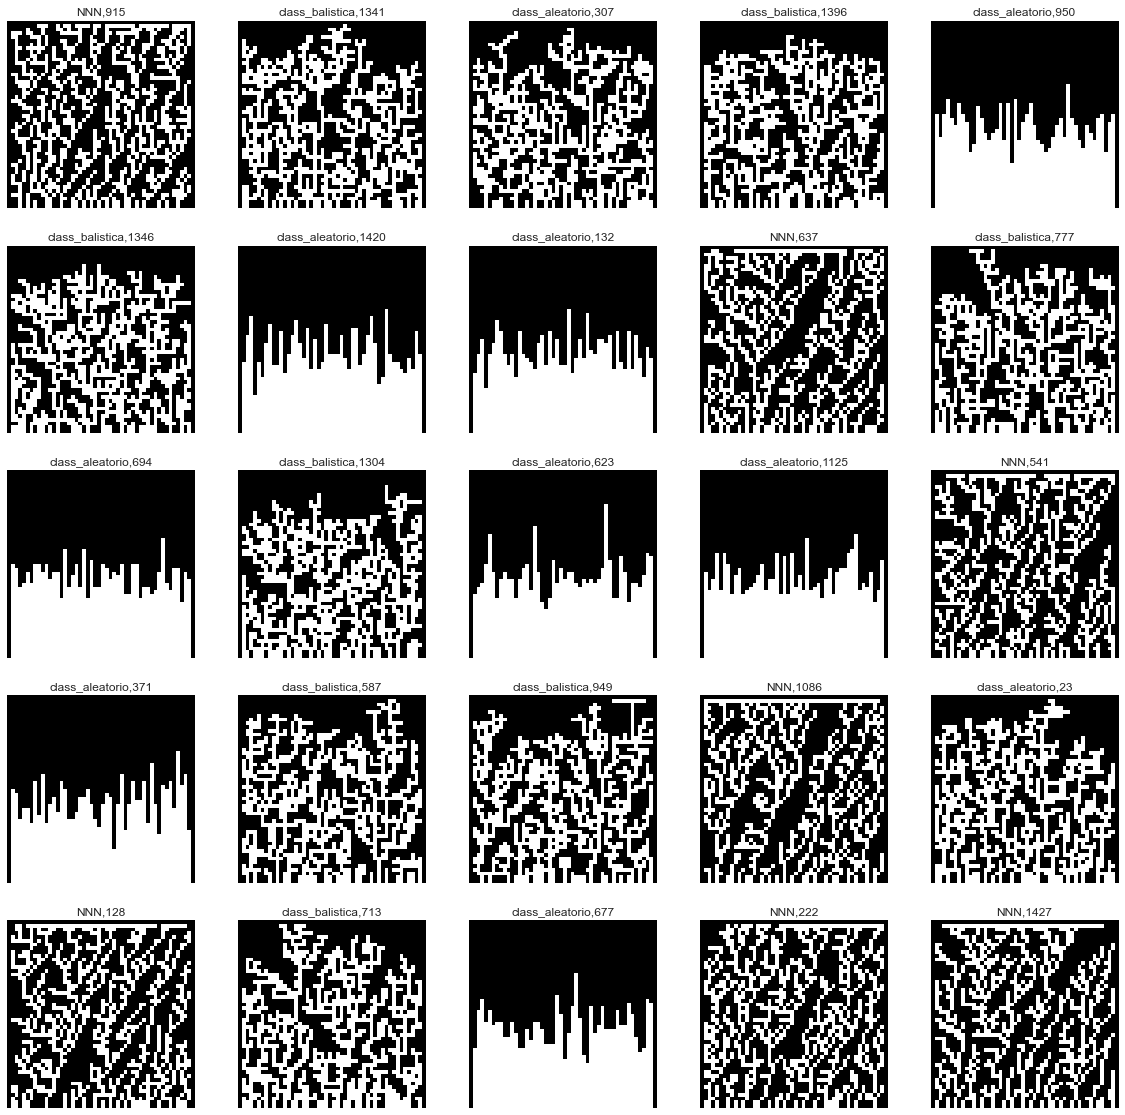

In [119]:
fig,ax=plt.subplots(5,5,figsize=(20,20))
for i in range(5):
    for j in range(5):
        k=np.random.randint(0,len(x_train))
        ax[i,j].imshow(x_train[k]/255.0)
        ax[i,j].set_title(f"{y_train[k]},{k}")
        ax[i,j].axis('off')
plt.show()

Plotting some of the images in the train_set with the class

## Coding categorical values

Machine Learning algorithms dont work well if they are non-numeric values. So we are going to use de OrdinalEncoder function to transform each class in an integer value

In [203]:
from sklearn.preprocessing import OrdinalEncoder
codi=OrdinalEncoder()
Y_t=codi.fit_transform(y_train.reshape(-1,1))
coded_df=pd.DataFrame(np.c_[Y_t,y_train.reshape(-1,1)],columns=["Coded","Non coded"])
coded_df

,Coded,Non coded
0,0.0,NNN
1,1.0,class_aleatorio
2,1.0,class_aleatorio
3,2.0,class_balistica
4,1.0,class_aleatorio
...,...,...
1424,0.0,NNN
1425,0.0,NNN
1426,2.0,class_balistica
1427,0.0,NNN


The above DataFrame shows how the codification works, each categorical class is transformed into a number. The next step would be normalize the input data, but in image problems this is easy, we just divide the value of each pixel by 255.0. Doing this we will have the pixel values in the range [0,1] and Machine Learning algorithms work better if the data has closer values.

We will reshape the images to train the clasifier, transformin the imagen array in 1-D array with each pixel being a feature

In [204]:
print(f"images in the train set: {x_train.shape} \nimages in the test set: {x_test.shape}")
print(f"each image has a siez of: {x_train[0].shape}")

images in the train set: (1429,) 
images in the test set: (159,)
each image has a siez of: (50, 50, 3)


No we know the number of images in each set and the size of the images. So we can reshape them into 1-D array

In [202]:

X_t=np.zeros([1429,7500])

for i in range(1429):
    X_t[i]=(x_train[i]/255.0).reshape(7500)
    
X_test=np.zeros([159,7500])

for i in range(159):
    X_test[i]=x_test[i].reshape(7500)



In [205]:
Y_t=np.ravel(Y_t) #Return a contiguous flattened array

## Creating and trainning the model

The images of this problem are quite simple so a simple model as SGDClassifier woulb be enough to achive a good accuracy

In [206]:
from sklearn.linear_model import SGDClassifier
clasi=SGDClassifier(random_state=42)

In [207]:
clasi.fit(X_t,Y_t)

SGDClassifier(random_state=42)

To avoid overfitting is a good idea to use cross_validation

In [209]:
from sklearn.model_selection import cross_val_score
puntuacion=cross_val_score(clasi,X_t,Y_t,scoring="accuracy",cv=10)
print(puntuacion,puntuacion.mean())

[0.92307692 0.94405594 0.9020979  0.92307692 0.93706294 0.96503497
 0.94405594 0.91608392 0.93006993 0.92957746] 0.9314192849404117


We achive more of 90% of accuracy in each fold, the input data has the same number of each class wo we can be sure that we are not having overfitting. However, we expect a lower value of accuracy in the test_set

## Predicting values

Now we can use the test_set and see what acurracy we get

In [213]:
Y_test=codi.transform(y_test.reshape(-1,1))

In [214]:
y_pred=clasi.predict(X_test)

In [215]:
from sklearn.metrics import accuracy_score
precision_test=accuracy_score(np.ravel(Y_test),y_pred)
precision_test

0.9308176100628931

In [239]:
precision_df=pd.DataFrame(np.c_[codi.inverse_transform(y_pred.reshape(-1,1)),codi.inverse_transform(np.ravel(Y_test).reshape(-1,1))],columns=["SGD predicted","test"])
precision_df

,SGD predicted,test
0,class_balistica,class_balistica
1,class_aleatorio,class_aleatorio
2,NNN,NNN
3,class_aleatorio,class_aleatorio
4,class_balistica,class_balistica
...,...,...
154,NNN,NNN
155,class_aleatorio,class_aleatorio
156,class_aleatorio,class_aleatorio
157,NNN,NNN


Finally we see the predicted classes and the test classes in the above DataFrame

## Conclusions

In a machine learning problem it is convinient to test diferent models and once we have a few models with high precision we try to improve the acurracy changing the hypermarameters. This project was simple so we didnt need test different models to achive a high accuracy